<a href="https://colab.research.google.com/github/PKpacheco/dl_assignment_2/blob/main/deep_learning_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: Date Fruit Classification
Group 8:
* Paola Katherine Pacheco
* Wai Ping Kwok
* Xueyao Wang

# 1) Data

## 1.a) Load Date_Fruit_Datasets.csv into a pandas dataframe. Print out the header. Use pandas.DataFrame.describe to summarize the data. Using markdown, explain the meaning of the columns (as well as you can with the information available) and make observations about the dataset.


In [231]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, minmax_scale
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import  numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
from tabulate import tabulate


In [191]:
# load the data uploaded to github into a pandas DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/PKpacheco/dl_assignment_2/main/Date_Fruit_Datasets.csv")

In [192]:
# print the header
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-5.919126e+10,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-3.423307e+10,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-9.394835e+10,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-3.207431e+10,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-3.998097e+10,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


## 1.b) Use pandas.DataFrame.info to check if the entries are the correct datatype, and if there are any missing values. Use pandas.DataFrame.duplicates to check for duplicate entries. Fix the dataset so that there are no missing values, duplicate rows, or incorrect data types. Use markdown to make observations and explain what you have done.


In [193]:
# summarize the data
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091220e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


**Observations:** WIP
* The dataset contains X features and X label.

**Description of the columns:**
1.


* From the summary, we can see that the range of features varied, we should apply scaler before we put the data into model.



In [194]:
# check for duplicate entries
df.duplicated().sum()

0

In [195]:
# show the duplicate entries
duplicateRows = df[df.duplicated()]
duplicateRows

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class


In [196]:
# check for null value
df.isna().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

## 1.c) Create a bar plot using seaborn.barplot of the number of elements in each category. Use markdown to comment on how well balanced the dataset is.


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

Text(0.5, 1.0, 'Number of Elements in Each Category')

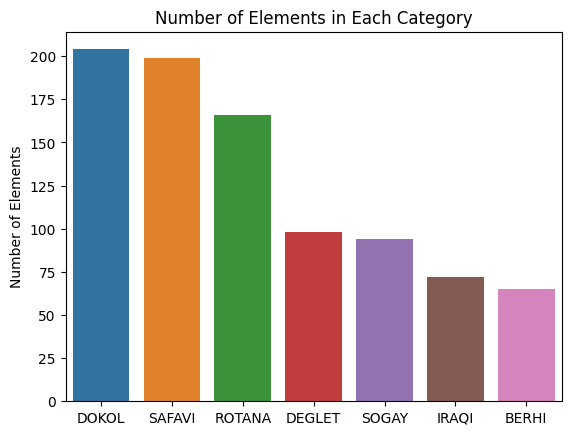

In [198]:
# plot all categories

sns.barplot(x=df['Class'].value_counts().index, y=df['Class'].value_counts())
plt.ylabel('Number of Elements')
plt.title('Number of Elements in Each Category')



<Axes: ylabel='Class'>

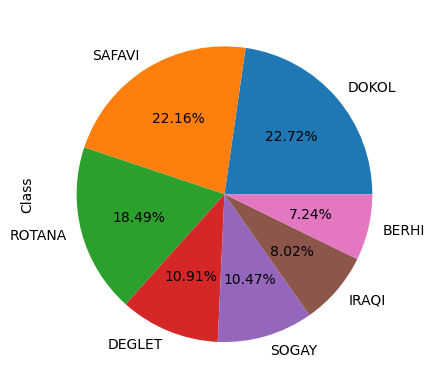

In [199]:
df["Class"].value_counts().plot(kind="pie", autopct="%.2f%%")


<Axes: xlabel='AREA', ylabel='PERIMETER'>

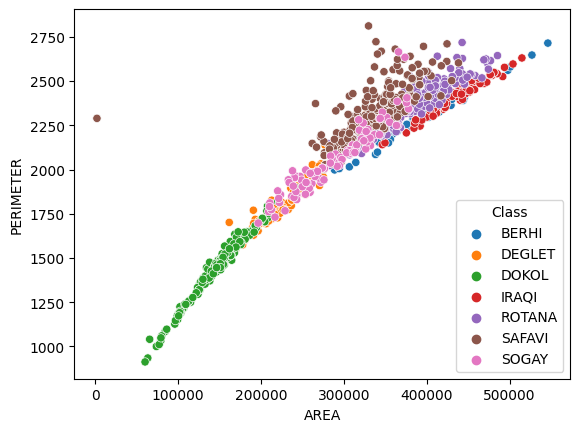

In [200]:
sns.scatterplot(data=df, x="AREA", y="PERIMETER", hue="Class")


Based on the graphs, the data is not distributed equally

## 1.d) Move the labels into a separate dataframe and use sklearn.preprocessing.LabelEncoder to convert the string labels into integers. Reshape the labels into a 2d array. Determine which number has been assigned to each type of date and record this information in markdown. Split the data into training, testing and validation sets with appropriate proportions.


In [201]:
# check shape
df.shape


(898, 35)

In [202]:
# check all classes
df["Class"].unique()

array(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
      dtype=object)

In [203]:
# move lables to a separate df
label_df = df[['Class']]

In [204]:
label_df.head()

,Class
0,BERHI
1,BERHI
2,BERHI
3,BERHI
4,BERHI


In [205]:
# Label Encoder
lab_enc = LabelEncoder()
label_encoded = lab_enc.fit_transform(label_df['Class'])

In [206]:
label_encoded.shape

(898,)

In [207]:
# shape
label_encoded_shaped = label_encoded.reshape(label_encoded.shape[0], 1)


In [208]:
label_encoded_shaped.shape

(898, 1)

In [209]:
# identify label_encoded and values assigned
label_assignned = {label: encoded_value for label, encoded_value in zip(label_df['Class'], label_encoded)}

label_assignned

{'BERHI': 0,
 'DEGLET': 1,
 'DOKOL': 2,
 'IRAQI': 3,
 'ROTANA': 4,
 'SAFAVI': 5,
 'SOGAY': 6}

In [210]:
# remove df[['Class']] from df
df = df.drop(['Class'], axis=1)

In [211]:
# get the reader for csv_data
header = df.columns

# init the StandardScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
scaled_data = scaler.fit_transform(df)

# create new df with scaled data
scaled_df = pd.DataFrame(scaled_data, columns=header)

# print  header of the new scaled df
print(scaled_df.head())

       AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0  0.772274   0.772079    0.565604    0.841941      0.446429  0.871512   
1  0.617835   0.617480    0.436904    0.775906      0.342186  0.773229   
2  0.964674   0.913374    0.681733    0.933143      0.464896  0.981104   
3  0.761063   0.757502    0.554467    0.841456      0.430098  0.864727   
4  0.635159   0.657060    0.482240    0.759716      0.460470  0.784821   

   SOLIDITY  CONVEX_AREA    EXTENT  ASPECT_RATIO  ...    SkewRB  KurtosisRR  \
0  0.983209     0.767108  0.787438      0.000435  ...  0.395739    0.062495   
1  1.000000     0.611906  0.776970      0.000282  ...  0.350002    0.037387   
2  0.992537     0.956896  0.736842      0.000467  ...  0.472509    0.083531   
3  0.983831     0.755891  0.766502      0.000408  ...  0.687121    0.136202   
4  0.958955     0.633316  0.711253      0.000459  ...  0.464794    0.040608   

   KurtosisRG  KurtosisRB  EntropyRR  EntropyRG  EntropyRB  ALLdaub4RR  \
0    0

In [212]:
# split data to train and test set
X_train, X_test_1, y_train, y_test_1 = train_test_split(scaled_df, label_encoded_shaped, test_size=0.2, random_state=50)


In [213]:

X_test, X_validate, y_test, y_validate = train_test_split(X_test_1,
                                                          y_test_1,
                                                          train_size=0.5,
                                                          random_state=80)

In [214]:
print("x_train", X_train.shape)
print("x_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)
print("x_validate",X_validate.shape)
print("y_validate",y_validate.shape)


x_train (718, 34)
x_test (90, 34)
y_train (718, 1)
y_test (90, 1)
x_validate (90, 34)
y_validate (90, 1)


# 2) Modeling


## 2.a) Use tf.keras.Sequential to create a fully connected artificial neural network with at least two hidden layers. Choose an activation function for each layer, and make sure the input and output dimensions are appropriate for the data. Print a summary of the model using tf.summary.


In [215]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(32,input_shape=[34],activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(7,activation='softmax')
])

In [216]:
model.summary()


Model: "sequential_99"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_301 (Dense)           (None, 32)                1120      
                                                                 
 dropout_35 (Dropout)        (None, 32)                0         
                                                                 
 dense_302 (Dense)           (None, 16)                528       
                                                                 
 batch_normalization_2 (Bat  (None, 16)                64        
 chNormalization)                                                
                                                                 
 dense_303 (Dense)           (None, 7)                 119       
                                                                 
Total params: 1831 (7.15 KB)
Trainable params: 1799 (7.03 KB)
Non-trainable params: 32 (128.00 Byte)
__________________

## 2.b) Compile the model with a choice of optimizer and loss function, and the set the metrics argument equal to ['accuracy'].


In [217]:
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [218]:
model.summary()

Model: "sequential_99"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_301 (Dense)           (None, 32)                1120      
                                                                 
 dropout_35 (Dropout)        (None, 32)                0         
                                                                 
 dense_302 (Dense)           (None, 16)                528       
                                                                 
 batch_normalization_2 (Bat  (None, 16)                64        
 chNormalization)                                                
                                                                 
 dense_303 (Dense)           (None, 7)                 119       
                                                                 
Total params: 1831 (7.15 KB)
Trainable params: 1799 (7.03 KB)
Non-trainable params: 32 (128.00 Byte)
__________________

## 2.c) Train the model and record the training accuracy. Find the validation accuracy and confusion matrix.


In [219]:
epochs = 100
results = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_validate, y_validate))


Epoch 1/100
23/23 [==============================] - 2s 13ms/step - loss: 2.1290 - accuracy: 0.2103 - val_loss: 1.8627 - val_accuracy: 0.3222
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 1.7647 - accuracy: 0.3203 - val_loss: 1.7542 - val_accuracy: 0.5444
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 1.4667 - accuracy: 0.4735 - val_loss: 1.6548 - val_accuracy: 0.6111
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 1.2436 - accuracy: 0.5864 - val_loss: 1.5643 - val_accuracy: 0.6556
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 1.1152 - accuracy: 0.6086 - val_loss: 1.5049 - val_accuracy: 0.6556
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 1.0176 - accuracy: 0.6546 - val_loss: 1.4586 - val_accuracy: 0.6556
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 0.9610 - accuracy: 0.6755 - val_loss: 1.4126 - val_accuracy: 0.6667
Epoch 8/100


In [220]:
train_accuracy = results.history['accuracy'][-1]

validate_accuracy = results.history['val_accuracy'][-1]

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", validate_accuracy)


Training Accuracy: 0.8690807819366455
Validation Accuracy: 0.8999999761581421


3/3 [==============================] - 0s 4ms/step


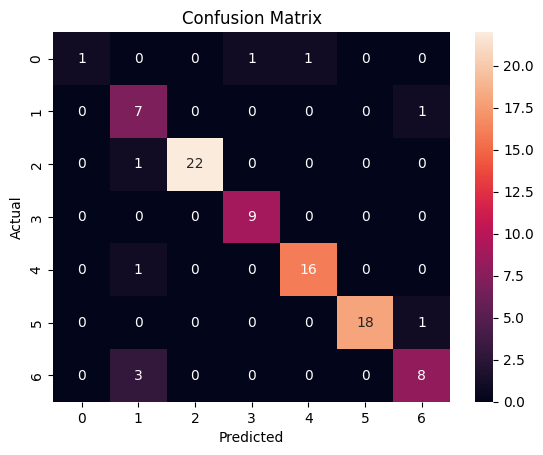

Confusion Matrix:
 [[ 1  0  0  1  1  0  0]
 [ 0  7  0  0  0  0  1]
 [ 0  1 22  0  0  0  0]
 [ 0  0  0  9  0  0  0]
 [ 0  1  0  0 16  0  0]
 [ 0  0  0  0  0 18  1]
 [ 0  3  0  0  0  0  8]]


In [221]:
y_pred_prob = model.predict(X_validate)
y_pred = np.argmax(y_pred_prob, axis=1)

# Create a confusion matrix
cm = confusion_matrix(y_validate, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Confusion Matrix:\n", cm)

## 2.d) Return to the above steps to try at least five different choices of hyperparameters (including dimensions, activation functions, number of layers, optimizer, loss function, etc.). Neatly present a description each model tried along with the training and validation accuracies, and the confusion matrix.


# 3) Conlcusion

## 3.a) Select the best model and justify your selection using markdown.


In [222]:
loss= 'sparse_categorical_crossentropy'
input_dim = 34
models = []


In [223]:
model1 = Sequential([
    Dense(64, activation='relu', input_dim=input_dim),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])
model1.compile(optimizer='adam', loss=loss,metrics=['accuracy'])
models.append(("Model 1", model1))


In [224]:
model2 = Sequential([
    Dense(128, activation='relu', input_dim=input_dim),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])
model2.compile(optimizer='adam', loss=loss,metrics=['accuracy'])
models.append(("Model 2", model2))


In [225]:
model3 = Sequential([
    Dense(128, activation='relu', input_dim=input_dim),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(7, activation='softmax')
])
model3.compile(optimizer='sgd', loss=loss,metrics=['accuracy'])
models.append(("Model 3", model3))



In [226]:
model4 = Sequential([
    Dense(32, activation='relu', input_dim=input_dim),
    Dense(7, activation='softmax')
])
model4.compile(optimizer='sgd', loss=loss, metrics=['accuracy'])
models.append(("Model 4", model4))

In [227]:
model5 = Sequential([
    Dense(128, activation='relu', input_dim=34),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])

model5.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
models.append(("Model 5", model5))


In [228]:
models

[('Model 1', <keras.src.engine.sequential.Sequential at 0x7d2a8e2295a0>),
 ('Model 2', <keras.src.engine.sequential.Sequential at 0x7d2a7aa41210>),
 ('Model 3', <keras.src.engine.sequential.Sequential at 0x7d2a8028e620>),
 ('Model 4', <keras.src.engine.sequential.Sequential at 0x7d2a84997df0>),
 ('Model 5', <keras.src.engine.sequential.Sequential at 0x7d2a844945b0>)]

In [248]:
import sklearn
results =[]
confusion_matrices = []

for model_name, model in models:
    result = model.fit(X_train, y_train, epochs=3, validation_data=(X_validate, y_validate))

    train_accuracy = result.history['accuracy'][-1]
    validate_accuracy = result.history['val_accuracy'][-1]
    layers_num = len(model.layers)
    count_params = model.count_params()
    optim_name = model.optimizer.get_config()["name"]
    model_loss = model.loss

    # Append the results to the list
    results.append([model_name,
                    train_accuracy,
                    validate_accuracy,
                    model.layers[0].activation.__name__,
                    layers_num,
                    count_params,
                    optim_name,
                    model_loss
                    ],)




    # Calculate the confusion matrix and store it
    y_pred = model.predict(X_validate)
    cm = sklearn.metrics.confusion_matrix(y_validate, np.argmax(y_pred, axis=1))
    confusion_matrices.append(cm)



Epoch 1/3
23/23 [==============================] - 1s 55ms/step - loss: 0.3237 - accuracy: 0.8872 - val_loss: 0.2982 - val_accuracy: 0.9000
Epoch 2/3
23/23 [==============================] - 0s 21ms/step - loss: 0.3131 - accuracy: 0.8900 - val_loss: 0.2942 - val_accuracy: 0.9000
Epoch 3/3
3/3 [==============================] - 0s 4ms/step
Epoch 1/3
23/23 [==============================] - 0s 16ms/step - loss: 1.1365 - accuracy: 0.6142 - val_loss: 0.8396 - val_accuracy: 0.6667
Epoch 2/3
23/23 [==============================] - 0s 7ms/step - loss: 0.9886 - accuracy: 0.6532 - val_loss: 0.7361 - val_accuracy: 0.6556
Epoch 3/3
3/3 [==============================] - 0s 4ms/step
Epoch 1/3
23/23 [==============================] - 0s 10ms/step - loss: 1.7714 - accuracy: 0.4471 - val_loss: 1.7201 - val_accuracy: 0.4556
Epoch 2/3
23/23 [==============================] - 0s 6ms/step - loss: 1.7353 - accuracy: 0.4513 - val_loss: 1.6797 - val_accuracy: 0.5222
Epoch 3/3
3/3 [=========================

In [189]:
# Create a Pandas DataFrame from the results
results_df = pd.DataFrame(results, columns=["Model",
                                            "Training accuracy",
                                            "Validation accuracy",
                                            "Activation",
                                            "Num_layers",
                                            "count_params",
                                            "optimizer name",
                                            "model_loss"
                                            ])

# Print the table
print(tabulate(results_df, headers="keys", tablefmt="pretty"))

+---+----------+--------------------+---------------------+------------+------------+--------------+----------------+---------------------------------+
|   |  Model   | Training accuracy  | Validation accuracy | Activation | Num_layers | count_params | optimizer name |           model_loss            |
+---+----------+--------------------+---------------------+------------+------------+--------------+----------------+---------------------------------+
| 0 | Model 1: | 0.8718662858009338 | 0.8999999761581421  |    relu    |     3      |     4551     |      Adam      | sparse_categorical_crossentropy |
| 1 | Model 2: | 0.7785515189170837 | 0.8999999761581421  |    relu    |     7      |    15047     |      Adam      | sparse_categorical_crossentropy |
| 2 | Model 3: | 0.640668511390686  | 0.6888889074325562  |    relu    |     5      |    33863     |      SGD       | sparse_categorical_crossentropy |
| 3 | Model 4: | 0.6225626468658447 | 0.6333333253860474  |    relu    |     2      |   

In [249]:
for model_name, cm in zip(models, confusion_matrices):
    print(f"Confusion Matrix for {model_name}:\n{cm}")

Confusion Matrix for ('Model 1', <keras.src.engine.sequential.Sequential object at 0x7d2a8e2295a0>):
[[ 2  0  0  1  0  0  0]
 [ 0  8  0  0  0  0  0]
 [ 0  0 23  0  0  0  0]
 [ 0  0  0  9  0  0  0]
 [ 0  0  0  0 15  0  2]
 [ 0  0  0  0  0 17  2]
 [ 0  4  0  0  0  0  7]]
Confusion Matrix for ('Model 2', <keras.src.engine.sequential.Sequential object at 0x7d2a7aa41210>):
[[ 0  0  0  2  1  0  0]
 [ 0  3  3  0  1  0  1]
 [ 0  0 23  0  0  0  0]
 [ 0  0  0  3  0  6  0]
 [ 0  0  0  0 17  0  0]
 [ 0  0  0  0  0 19  0]
 [ 0  1  0  0  2  0  8]]
Confusion Matrix for ('Model 3', <keras.src.engine.sequential.Sequential object at 0x7d2a8028e620>):
[[ 0  0  1  0  0  2  0]
 [ 0  0  8  0  0  0  0]
 [ 0  0 23  0  0  0  0]
 [ 0  0  0  0  0  9  0]
 [ 0  0  8  0  9  0  0]
 [ 0  0  0  0  0 19  0]
 [ 0  0 11  0  0  0  0]]
Confusion Matrix for ('Model 4', <keras.src.engine.sequential.Sequential object at 0x7d2a84997df0>):
[[ 0  0  0  0  2  1  0]
 [ 0  0  8  0  0  0  0]
 [ 0  0 23  0  0  0  0]
 [ 0  0  0  0  0 

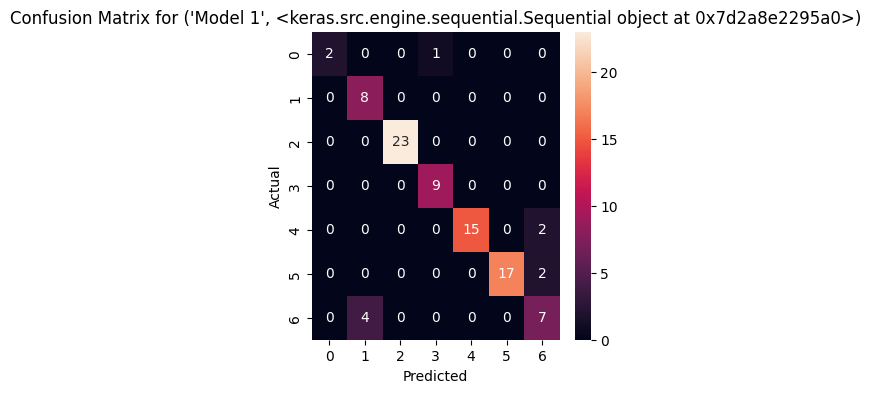

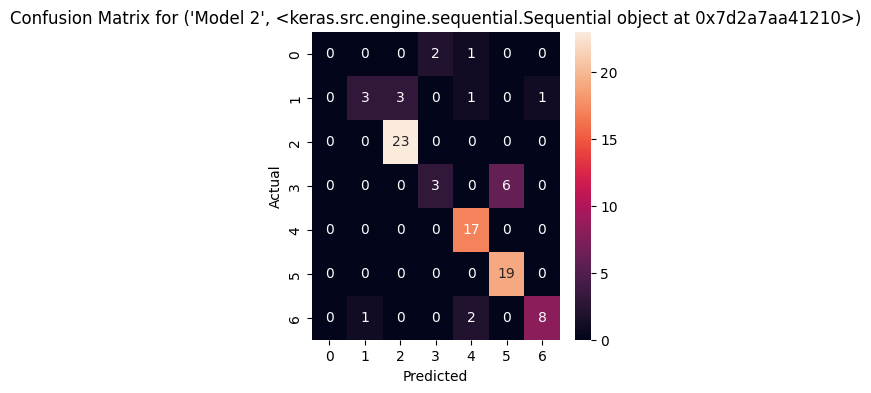

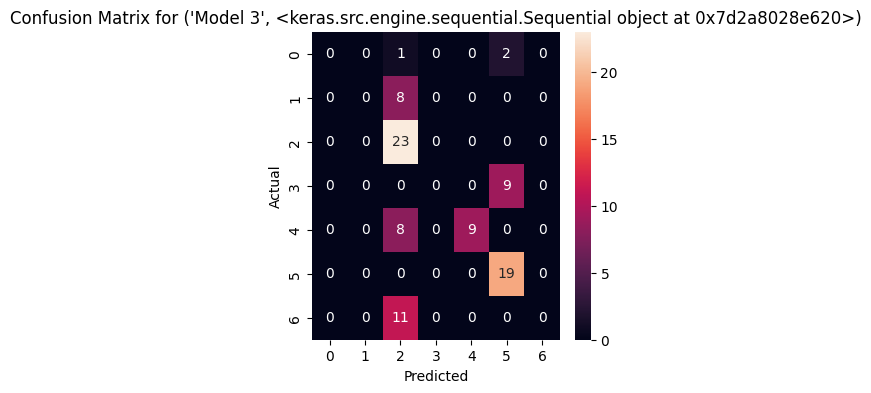

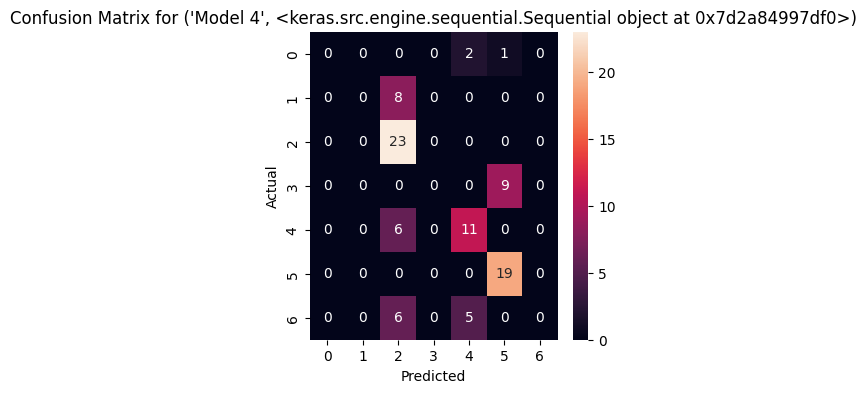

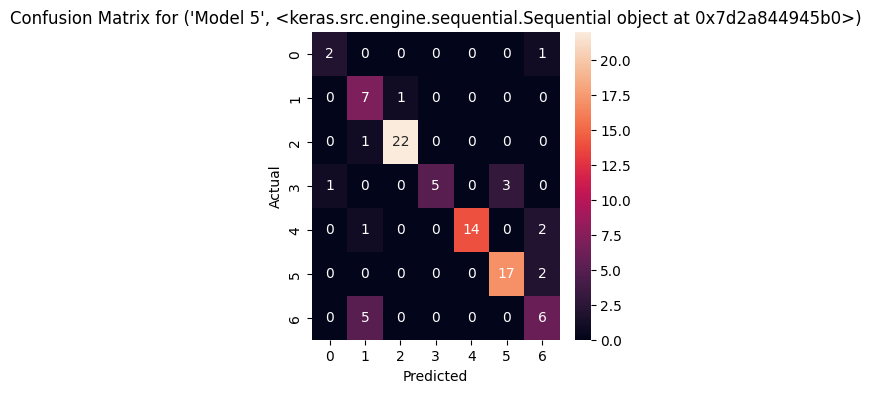

In [256]:
for model_name, cm in zip(models, confusion_matrices):
    plt.figure(figsize=(4,4))
    plt.title(f"Confusion Matrix - {model_name}")
    sns.heatmap(cm, annot=True, fmt="d")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

## 3.b) Use the best model to make predictions on the testing set. Find the testing accuracy and confusion matrix.


|  Model   | Training accuracy  | Validation accuracy | Activation | Num_layers | count_params | optimizer name |           model_loss            |

 Model 1: | 0.8718662858009338 | 0.8999999761581421  |    relu    |     3      |     4551     |      Adam      | sparse_categorical_crossentropy |


Model 1 is the best model, it has the highest validation accuracy, that is, when working with new data it performed well.


In [268]:
models[0]

('Model 1', <keras.src.engine.sequential.Sequential at 0x7d2a8e2295a0>)

In [275]:
models[0][1].summary()

Model: "sequential_100"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_304 (Dense)           (None, 64)                2240      
                                                                 
 dense_305 (Dense)           (None, 32)                2080      
                                                                 
 dense_306 (Dense)           (None, 7)                 231       
                                                                 
Total params: 4551 (17.78 KB)
Trainable params: 4551 (17.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [273]:
best_model = models[0][1]
y_pred = best_model.predict(X_test)
testing_accuracy = best_model.evaluate(X_test, y_test)[1]

print("testing Accuracy:", testing_accuracy)




3/3 [==============================] - 0s 7ms/step - loss: 0.4910 - accuracy: 0.9444
testing Accuracy: 0.9444444179534912


In [279]:
cm = sklearn.metrics.confusion_matrix(y_test, np.argmax(y_pred, axis=1))

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[11  0  0  0  0  0  0]
 [ 0  4  1  0  0  0  1]
 [ 0  1 16  0  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  0  0 18  0  1]
 [ 0  0  1  0  0 23  0]
 [ 0  0  0  0  0  0  7]]


## 3.c) Use markdown to comment on how well the model works to make predictions for this use case.
